<a href="https://colab.research.google.com/github/Syeon0305/Heart-rate-monitoring-using-non-contact-photoplethysmogram-from-infrared-face-video/blob/master/Heart_rate_monitoring_using_non_contact_photoplethysmogram_from_infrared_face_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2020-(2) 인공신경망 수업 - 박소연** <br/><br/>
#**Heart rate monitoring using non-contact photoplethysmogram from infrared face video**
#적외선 안면 비디오를 통해서 rPPG를 추출해 심박수 모니터링을 할 수 있도록 심박(심박변이도) 추정

# github 연동


In [1]:
!git clone https://github.com/Syeon0305/Heart-rate-monitoring-using-non-contact-photoplethysmogram-from-infrared-face-video.git

Cloning into 'Heart-rate-monitoring-using-non-contact-photoplethysmogram-from-infrared-face-video'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 99 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (99/99), done.


# Google Colab과 Google Drive Mount하기

본 프로젝트에서, 구글 코랩을 구글 드라이브와 마운트 하여 모든 자료와 코드를 관리하였다. 따라서 아래는 구글 코랩과 드라이브를 연동하는 코드이며, 매 런타임 연결마다 진행되어야 데이터 로드가 가능하다.

In [ ]:
#구글 코랩과 드라이브 연동
#실행 후 링크 로그인, Authorization Code 입력하면 Mount 완료

from google.colab import drive 

drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
### 확인 코드
#구글 드라이브/내 드라이브/Colab Notebooks 디렉터리에 있는 파일 검색
#'gdrive/My Drive 항상 경로 앞에 붙여줘야함
!ls '/content/gdrive/My Drive/Colab Notebooks/'
#!rm -r 'gdrive/My Drive/Colab Notebooks/ML_sample_data' #삭제코드니까 삭제하려는 이유 아니면 실행x


#Data Preprocessing - 원본데이터에서 사용할 데이터 가공 (최초 1회 실행)

VIPL-HR 데이터베이스를 사용할 예정이다.가공 후 sample_data를 최종적으로 만든다.
sample_data의 경우 Y(channel x frames), fs(hz), cppg(time, signal), prior_bpm 의 열을 가질 예정이다. 코드 작성에서 실행 후 최종 점검까지 총 ?일이 소요되었다. 최초 1회만 실행하면 되는 코드이므로 모두 텍스트모드로 전환시켰다.

1. 원본 데이터 불러오기 
2. video_landmarks_processing
3. butter highpass filter처리 후 yhat구하기
4. PPG 센서로 부터 얻은 PPG 신호처리
5. sample data 생성

## 1. 원본 데이터 불러오기

## 2. video_landmarks_processing

## 3. butter highpass filter처리 후 yhat구하기

## 4. PPG 센서로 부터 얻은 PPG 신호처리

## 5. sample data 생성

**Sample Data 생성 완료!**

#**Data Load 및 npy 파일(pkl 파일) 생성 후 백업**






원본으로부터 추출하여 구글 드라이브에 저장해 둔 이미지 파일들을 코랩에 로드하여 buffer highpass filter 처리하였다. 기존 파일이 너무 크다보니, 데이터 로드에만 1-2시간이 걸려서, npy파일(pkl파일)을 생성하여 구글 드라이브에 저장해 두도록 했다. 

## 1. Data Load


In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection

## 2. 데이터 로드 후 npy파일(pkl파일)로 백업하기 (최초 1회만 실행)

### 1) filtering 된 rough rPPG signal을 input

### 2) 이미지 데이터 input



```
#소연PC path
#file_path='/content/drive/My Drive/Colab Notebooks/Artificial neural network/Sample'

X=[]
Y=[]

files = os.listdir(file_path)
#for file in tqdm(files):
for file in files:
        print(file)
        full_path = file_path +'/'+ file
        image = Image.open(full_path)
        resize_img = image.resize((128, 128))

        # image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        # resize_img = cv2.resize((128, 128))
        r, g, b = resize_img.split()
        # resize_img = cv2.resize(image, None, fx = 128, fy = 128)
    # 각 쪼갠 이미지를 255로 나눠서 0~1 사이의 값이 나오도록 정규화 한다.
        r_resize_img = np.asarray(np.float32(r) / 255.0) 
        b_resize_img = np.asarray(np.float32(g) / 255.0)
        g_resize_img = np.asarray(np.float32(b) / 255.0)
        
        rgb_resize_img = np.asarray([r_resize_img, b_resize_img, g_resize_img])
    # 이렇게 가공한 이미지를 추가한다. 
    # np.asarray: 입력 데이터를 다차원배열(ndarray)로 변환하나 이미 ndarray일 경우에는 새로 메모리에 ndarray가 생성되지는 않는다

        X.append(rgb_resize_img)
        if (file.split('/')[-1]).split('_')[-2] == 'E01': label = 0
        elif (file.split('/')[-1]).split('_')[-2] == 'E02': label = 1
        else : label = 2
        Y.append(label)
        print(label)
print(pd.DataFrame(X[0][0]).shape) #(128, 128)

#로드된 데이터를 npy 파일로 중간 저장함으로써 추가적인 시간 소모를 줄인다
data = np.array(X, dtype='float32')
label = np.array(Y, dtype='int64')

np.save('/content/gdrive/Shared drives/2020_ML/K_Face_Sample/np_data', data)
np.save('/content/gdrive/Shared drives/2020_ML/K_Face_Sample/np_label', label)
```



## 3. npy파일으로부터 train/valid/test parsing




저장된 npy파일을 매 런타임마다 불러와서 train/valid/test로 나누어 dataloader를 생성한다.

In [ ]:
#seed 고정하여 여러 번 수행해도 같은 값 나오도록
torch.cuda.manual_seed_all(0)

In [ ]:
#데이터가 저장된 npy파일을 로드한다
#원래는 아래 경로였으나, 계속해서 데이터 크기로 인한 io에러로 인해 공유드라이브 말고 다른 경로로 지정
#'/content/gdrive/Shared drives/2020_ML/K_Face_Sample/np_data.npy'
#'/content/gdrive/Shared drives/2020_ML/K_Face_Sample/np_label.npy'
data = np.load('/content/gdrive/Shared drives/2020_ML/K_Face_npy/np_data.npy')
label = np.load('/content/gdrive/Shared drives/2020_ML/K_Face_npy/np_label.npy')

# train/valid/test으로 나눈다
# 60/20/20
train_X, ttest_X, train_Y, ttest_Y = model_selection.train_test_split(data, label, test_size=0.4)
vali_X, test_X, vali_Y, test_Y = model_selection.train_test_split(ttest_X, ttest_Y, test_size = 0.5)

train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

vali_X = torch.from_numpy(vali_X).float()
vali_Y = torch.from_numpy(vali_Y).long()

test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

train = TensorDataset(train_X, train_Y)
vali = TensorDataset(vali_X, vali_Y)
train_loader = DataLoader(train, batch_size=32, shuffle=True)
vali_loader = DataLoader(vali, batch_size= 32, shuffle=True)

In [ ]:
train_X.shape #torch.Size([9136, 3, 128, 128]) 

torch.Size([9136, 3, 128, 128])

In [ ]:
vali_X.shape #torch.Size([3046, 3, 128, 128])

torch.Size([3046, 3, 128, 128])

In [ ]:
test_X.shape #torch.Size([3046, 3, 128, 128])

torch.Size([3046, 3, 128, 128])

# Model

모델 설명

#Initialization & Accuracy Checking

In [ ]:
torch.cuda.manual_seed_all(0)
#ReLU Activation에 맞는 Initialization Strategy
# 우리의 initialization의 목적은 샘플 하나 들어왔을 때, 
# 각각 hidden layer의 element에 들어있는 초깃값의 분포가 대강 variance가 균일하면 좋겠다
# weight matrix를 초기화할때, standard normal로 넣어주되, input dimension으로 나누어 주어야 한다
# ReLU에 적합시키려면, input dimension*2에 sqrt를 한 값을 나눠주어야 함 
# (ReLU가 negative쪽을 반을 날리기 때문에 그것의 변동성을 회복하기 위해서)
# create a weight of shape [3 x 5]
# Recall that we have imported `torch.nn` as `nn`

# Weight initialization by Kaiming initialilzation
print(nn.init.kaiming_normal_(torch.empty(3,5, dtype=dtype, device=device)))
# floating point 32비트,GPU사용, (3,5) 텐서 안에 kaiming normal에 따르는 initial value가 자동적으로 들어감
# Bias initialization by zeros
# bias는 linear를 통째로 얼만큼 평행이동 할 것인가의 얘기
# 0 근처에서 왔다갔다 하려면 bias는 0으로 해 주어야 한다.
print(nn.init.zeros_(torch.empty(3,5, dtype=dtype, device=device)))

tensor([[-0.5848, -0.2690, -1.6721,  0.0918, -0.0764],
        [-0.3667, -0.3939, -0.2077, -0.6796, -0.2297],
        [-1.0569,  1.4328,  0.1971, -0.1165,  0.8137]], device='cuda:0')
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')


In [ ]:
def check_accuracy_part2(loader, model_fn, params):
  #cifar10을 dataloader로 불러와서 loader 객체로 받음
  """
  Check the accuracy of a classification model.
  
  Inputs:
  - loader: A DataLoader for the data split we want to check
  - model_fn: A function that performs the forward pass of the model,
    with the signature scores = model_fn(x, params)
  - params: List of PyTorch Tensors giving parameters of the model
  
  Returns: Nothing, but prints the accuracy of the model
  """
  split = 'val' if loader.dataset else 'test'
  # loader.dataset.train에 이 데이터셋이 val이 대응하는지 test에 대응하는지 있음
  # val이라면 true, test라면 false

  print('Checking accuracy on the %s set' % split)
  num_correct, num_samples = 0, 0
  with torch.no_grad():
    for x, y in loader:
      # x input image 
      # y label
      x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
      y = y.to(device=device, dtype=ltype)
      scores = model_fn(x, params) # score 계산 (N,C)텐서
      _, preds = scores.max(dim=1) # max(dim=1) 하면 reduction 연산이 되어 (N,1) 텐서만 남음
      # dim=1은 C에 대응할 것인데 max(dim=1)하면 size N 벡터가 됨
      # 각 row마다 score가 가장 큰 index를 내보내게 됨
      num_correct += (preds == y).sum()
      num_samples += preds.size(0)
    acc = float(num_correct) / num_samples #accuracy
    print('Got %d / %d correct (%.2f%%)' % (num_correct, num_samples, 100 * acc))

In [ ]:
def train_part2(model_fn, params, learning_rate):
  # SGD 알고리즘의 learning rate는 지정해 주어야 함
  """
  Train a model on CIFAR-10.
  
  Inputs:
  - model_fn: A Python function that performs the forward pass of the model.
    It should have the signature scores = model_fn(x, params) where x is a
    PyTorch Tensor of image data, params is a list of PyTorch Tensors giving
    model weights, and scores is a PyTorch Tensor of shape (N, C) giving
    scores for the elements in x.
  - params: List of PyTorch Tensors giving weights for the model
  - learning_rate: Python scalar giving the learning rate to use for SGD
  
  Returns: Nothing 리턴하는 것 없음 
  training part 2를 하면 알아서 params가 업데이트 될 것이기 때문에 굳이 리턴x
  """
  for t, (x, y) in enumerate(train_loader): #Gradient Descent
    # Move the data to the proper device (GPU or CPU)
    x = x.to(device=device, dtype=dtype)
    y = y.to(device=device, dtype=ltype)

    # Forward pass: compute scores and loss
    scores = model_fn(x, params) # input 모델에 대한 score 계산
    loss = F.cross_entropy(scores, y) # predict된 score 넣고 true label넣어서 loss 계산

    # Backward pass: PyTorch figures out which Tensors in the computational
    # graph has requires_grad=True and uses backpropagation to compute the
    # gradient of the loss with respect to these Tensors, and stores the
    # gradients in the .grad attribute of each Tensor.
    loss.backward() # 위에 있는 computational graph 추적 후 gradient 계산

    # Update parameters. We don't want to backpropagate through the
    # parameter updates, so we scope the updates under a torch.no_grad()
    # context manager to prevent a computational graph from being built.
    with torch.no_grad(): # SGD 사용하므로 computational graph 사용x
    #computational graph 추적하지 말라는 명령
      for w in params: # params에 있는 모든 w에 대해서
        if w.requires_grad: # 모든 w이 gradient가 필요하진 않을 수 있으니까
          w -= learning_rate * w.grad
          # loader 기능 자체가 배치사이즈 64 나눌 때 이미 SGD 들어가 있음

          # Manually zero the gradients after running the backward pass
          w.grad.zero_() # gradident 쓰고 나서는 초기화 시켜야 함

    if t % print_every == 0 or t == len(train_loader)-1:
      print('Iteration %d, loss = %.4f' % (t, loss.item()))
      check_accuracy_part2(vali_loader, model_fn, params)
      # validation set 넣었을 때, 현재 업데이트 된 param에 대한 accuracy
      print()

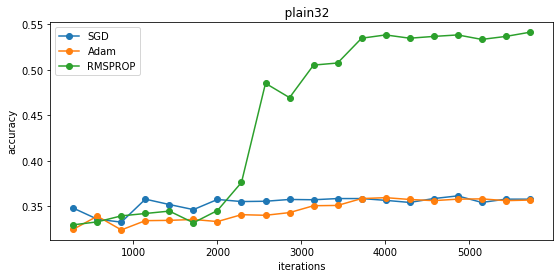

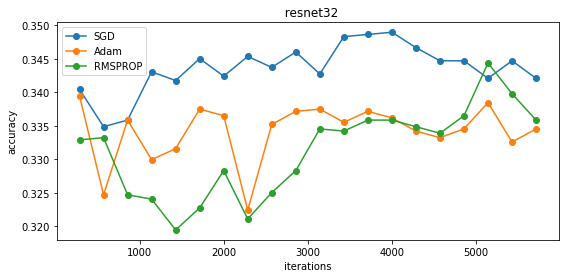

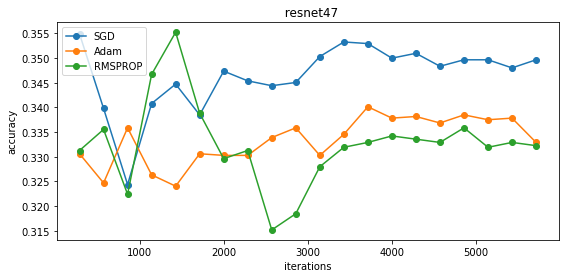

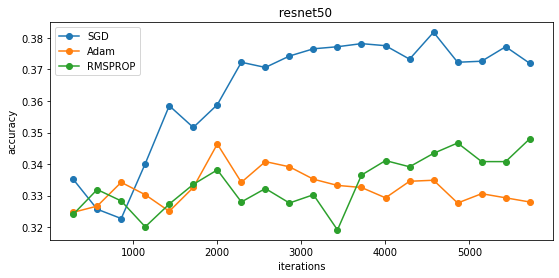

In [ ]:
#각 모델에서 Optimizer를 바꿔가며 비교
for name in names:
  plt.title('%10s'%name)
  plt.plot(iter_history_dict1[name], acc_history_dict1[name], '-o')
  plt.plot(iter_history_dict2[name], acc_history_dict2[name], '-o')
  plt.plot(iter_history_dict3[name], acc_history_dict3[name], '-o')
  plt.legend(['SGD','Adam','RMSPROP'], loc='upper left')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.gcf().set_size_inches(9, 4)
  plt.show()

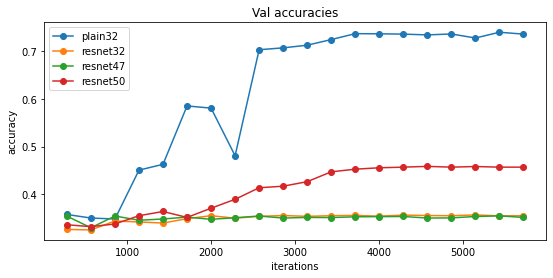

In [ ]:
##Optimizer에 대해 비교하지 않고 모델 간 비교할 때 plot
plt.title('Val accuracies')
for name in names:
  plt.plot(iter_history_dict1[name], acc_history_dict1[name], '-o')
plt.legend(names, loc='upper left')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.gcf().set_size_inches(9, 4)
plt.show()

#PyTorch TorchVision Model with FineTuning - Model Performance Test

PyTorch에서 제공하는 Torchvsion.Models 를 이용하여 ResNet, VGG19, AlexNet, DenseNet을 finetuning하였다. 각각 finetuning한 모델을 모듈화하였으며, 각 optimizer를 바꾸어가며 모델의 accuracy를 plot으로 작성하여 시각화하였다. 

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim

# for image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
  classes = ('무표정', '웃음', '찡그림')
  sgd_acc=[]
  adam_acc=[]
  rmsprop_acc=[]

In [ ]:
def Test_GPU(net):
  print('\n===> Training Start')

  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  net.to(device)
  if torch.cuda.device_count() > 1:
      print('\n===> Training on GPU!')
      net = nn.DataParallel(net)
  return device

In [ ]:
def Train_CNN(net, optimizer, device):

  epochs = 10 # dataset을 여러번 사용해 트레이닝 시킨다.
  criterion = nn.CrossEntropyLoss()
  
  for epoch in range(epochs):
      print('\n===> epoch %d' % epoch)
      running_loss = 0.0

      for i, data in enumerate(train_loader, 0):
          # get the inputs
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          #outputs size 확인
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()

          if i % 100 == 99:    # print every 100 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 100))
              running_loss = 0.0

In [ ]:
def Check_Accuracy(net, classes):
  class_correct = list(0. for i in range(3))
  class_total = list(0. for i in range(3))
  accuracy = [0,0,0]
  with torch.no_grad():
      for data in vali_loader:
          images, labels = data
          images, labels = images.cuda(), labels.cuda()
          outputs = net(images)
          _, predicted = torch.max(outputs, 1) # prediction
          c = (predicted == labels).squeeze()
          for i in range(4):
              label = labels[i]
              class_correct[label] += c[i].item()
              class_total[label] += 1

  for i in range(3):
    accuracy[i] = int(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (classes[i], accuracy[i]))

  return accuracy

In [ ]:
def Create_Plot(net_name, sgd_acc, adam_acc, rmsprop_acc):

  import numpy as np
  import matplotlib.pyplot as plt

  plt.figure(figsize = (10, 6))

  neutral=[]
  happy=[]
  sad=[]
  temp=[]
  
  for i in range(3):
    temp=[]
    temp.append(sgd_acc[i])
    temp.append(adam_acc[i])
    temp.append(rmsprop_acc[i])
    print(temp)
    if i==0: neutral=temp.copy(); del(temp)
    elif i==1: happy=temp.copy(); del(temp)
    else: sad=temp.copy()

  a = np.array([neutral, happy, sad])
  X=np.arange(3)

  plt.bar(X+0.00,a[0],color='#F78F2E',width=0.25)
  plt.bar(X+0.25,a[1],color='#EE3225',width=0.25)
  plt.bar(X+0.50,a[2],color='#FFC222',width=0.25)

  topics = ['A', 'B', 'C']

  plt.xticks([0.25,1.25,2.25], ["SGD", "Adam", "RMSProp"])
  plt.title("%10s Accuracy by Optimizer"% net_name)
  plt.legend(['neutral','happy','sad'])

**FineTune Model**

FineTuning을 통해 기존의 Torchvision.Models 수정하여 우리 데이터에 적합시킨다



In [ ]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [ ]:
def FineTune_DenseNet121():
  device = torch.device('cuda')
  net = models.densenet121(pretrained=True)
  for param in net.parameters():
    net.requires_grad= False

  num_ftrs = net.classifier.in_features
  net.classifier = Identity() ####기존의 FC를 초기화한 후 새로운 FC 생성
  net.classifier = nn.Linear(num_ftrs,3)
  print(net)

  net = net.to(device) # torchvision 에 이미 정의된 모델을 가져옵니다.
  criterion = nn.CrossEntropyLoss()
  net_name='DenseNet121'

  device=Test_GPU(net)

  param=filter(lambda p: p.requires_grad, net.parameters())

  return net, device, net_name, param

In [ ]:
def FineTune_ResNet18():

  net = models.resnet18(pretrained=True)
  for param in net.parameters():
    net.requires_grad= False

  num_ftrs = net.fc.in_features
  net.fc = Identity() ####기존의 FC를 초기화한 후 새로운 FC 생성
  net.fc = nn.Linear(num_ftrs,3)
  print(net)
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  net = net.to(device)

  criterion = nn.CrossEntropyLoss()

  net_name='ResNet18'
  device=Test_GPU(net)

  param=filter(lambda p: p.requires_grad, net.parameters())

  return net, device, net_name, param

In [ ]:
def FineTune_VGG19():
  net = models.vgg19(pretrained=True)#############마지막 레이어 지우기!
  print(net) # torchvision 에 이미 정의된 모델을 가져옵니다.
  for param in net.parameters():
    net.requires_grad= False

  num_ftrs = net.classifier[6].in_features
  net.classifier[6] = Identity() ####기존의 FC를 초기화한 후 새로운 FC 생성
  net.classifier[6] = nn.Linear(num_ftrs,3)
  print(net)

  criterion = nn.CrossEntropyLoss()
  net_name='VGG19'

  device=Test_GPU(net)

  param=filter(lambda p: p.requires_grad, net.parameters())

  return net, device, net_name, param

In [ ]:
def FineTune_AlexNet():
  net = models.alexnet(pretrained=True)#############마지막 레이어 지우기!
  print(net) # torchvision 에 이미 정의된 모델을 가져옵니다.
  for param in net.parameters():
    net.requires_grad= False

  num_ftrs = net.classifier[6].in_features
  net.classifier[6] = Identity() ####기존의 FC를 초기화한 후 새로운 FC 생성
  net.classifier[6] = nn.Linear(num_ftrs,3)
  print(net)

  criterion = nn.CrossEntropyLoss()
  net_name='AlexNet'

  device=Test_GPU(net)

  param=filter(lambda p: p.requires_grad, net.parameters())

  return net, device, net_name, param

**ResNet _FineTuned**

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

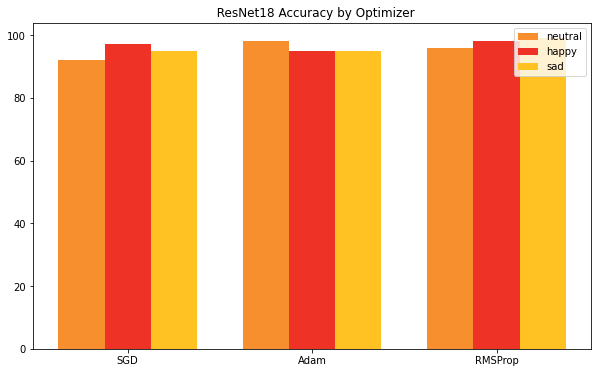

In [ ]:
# Resnet18 finetuned // performance test

net, device, net_name, param = FineTune_ResNet18()

print('(1) SGD\n')
optimizer1 = optim.SGD(param, lr=0.001, momentum=0.9)
Train_CNN(net, optimizer1, device)
print('+++++++++++++++++++++++++++++')
sgd_acc = Check_Accuracy(net,classes)
print(sgd_acc)
print('=============================\n\n')

param=filter(lambda p: p.requires_grad, net.parameters())

# optim.adam
print('(2) Adam\n')
optimizer2 = optim.Adam(param, lr=0.001)
Train_CNN(net, optimizer2, device)
print('+++++++++++++++++++++++++++++')
adam_acc = Check_Accuracy(net,classes)
print(adam_acc)
print('=============================\n\n')

param=filter(lambda p: p.requires_grad, net.parameters())

# optim.rmsprop
print('(3) RMSProp\n')
optimizer3 = optim.RMSprop(param, lr=0.001)
Train_CNN(net, optimizer3, device)
print('+++++++++++++++++++++++++++++')
rmsprop_acc = Check_Accuracy(net,classes)
print(rmsprop_acc)
print('=============================\n\n')

Create_Plot(net_name, sgd_acc, adam_acc, rmsprop_acc)

**VGGNet _FineTuned**

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

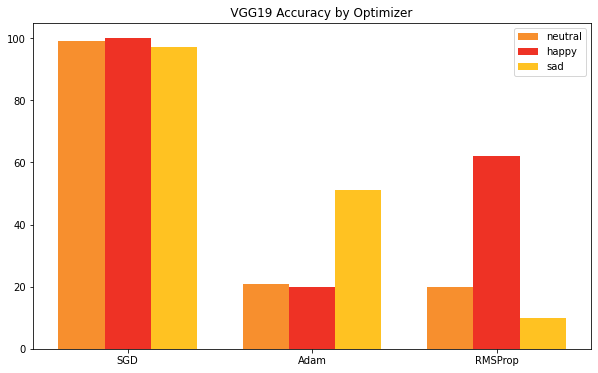

In [ ]:
#VGG19 finetuned // performance test

net, device, net_name, param = FineTune_VGG19()

print('(1) SGD\n')
optimizer1 = optim.SGD(param, lr=0.001, momentum=0.9)
Train_CNN(net, optimizer1, device)
print('+++++++++++++++++++++++++++++')
sgd_acc = Check_Accuracy(net,classes)
print(sgd_acc)
print('=============================\n\n')

param=filter(lambda p: p.requires_grad, net.parameters())
# optim.adam
print('(2) Adam\n')
optimizer2 = optim.Adam(param, lr=0.001)
Train_CNN(net, optimizer2, device)
print('+++++++++++++++++++++++++++++')
adam_acc = Check_Accuracy(net,classes)
print(adam_acc)
print('=============================\n\n')

param=filter(lambda p: p.requires_grad, net.parameters())
# optim.rmsprop
print('(3) RMSProp\n')
optimizer3 = optim.RMSprop(param, lr=0.001)
Train_CNN(net, optimizer3, device)
print('+++++++++++++++++++++++++++++')
rmsprop_acc = Check_Accuracy(net,classes)
print(rmsprop_acc)
print('=============================\n\n')

Create_Plot(net_name, sgd_acc, adam_acc, rmsprop_acc)

**DenseNet _FineTuned**

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth



DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

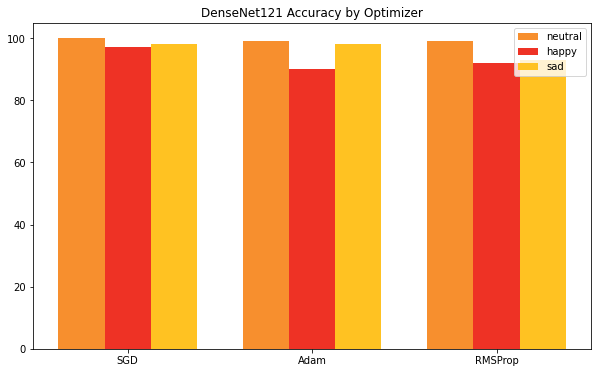

In [ ]:
#Densenet121 finetuned // performance test

net, device, net_name, param = FineTune_DenseNet121()

print('(1) SGD\n')
optimizer1 = optim.SGD(param, lr=0.001, momentum=0.9)
Train_CNN(net, optimizer1, device)
print('+++++++++++++++++++++++++++++')
sgd_acc = Check_Accuracy(net,classes)
print(sgd_acc)
print('=============================\n\n')

param=filter(lambda p: p.requires_grad, net.parameters())
# optim.adam
print('(2) Adam\n')
optimizer2 = optim.Adam(param, lr=0.001)
Train_CNN(net, optimizer2, device)
print('+++++++++++++++++++++++++++++')
adam_acc = Check_Accuracy(net,classes)
print(adam_acc)
print('=============================\n\n')

param=filter(lambda p: p.requires_grad, net.parameters())
# optim.rmsprop
print('(3) RMSProp\n')
optimizer3 = optim.RMSprop(param, lr=0.001)
Train_CNN(net, optimizer3, device)
print('+++++++++++++++++++++++++++++')
rmsprop_acc = Check_Accuracy(net,classes)
print(rmsprop_acc)
print('=============================\n\n')

Create_Plot(net_name, sgd_acc, adam_acc, rmsprop_acc)

**AlexNet _PyTorch Torchvision Model**

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

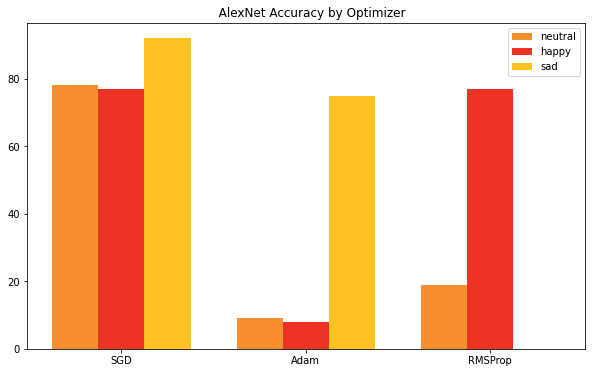

In [ ]:
#alexnet finetuned / performance test

net, device, net_name, param = FineTune_AlexNet()

print('(1) SGD\n')
optimizer1 = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
Train_CNN(net, optimizer1, device)
print('+++++++++++++++++++++++++++++')
sgd_acc = Check_Accuracy(net,classes)
print(sgd_acc)
print('=============================\n\n')

# optim.adam
print('(2) Adam\n')
optimizer2 = optim.Adam(net.parameters(), lr=0.001)
Train_CNN(net, optimizer2, device)
print('+++++++++++++++++++++++++++++')
adam_acc = Check_Accuracy(net,classes)
print(adam_acc)
print('=============================\n\n')

# optim.rmsprop
print('(3) RMSProp\n')
optimizer3 = optim.RMSprop(net.parameters(), lr=0.001)
Train_CNN(net, optimizer3, device)
print('+++++++++++++++++++++++++++++')
rmsprop_acc = Check_Accuracy(net,classes)
print(rmsprop_acc)
print('=============================\n\n')

Create_Plot(net_name, sgd_acc, adam_acc, rmsprop_acc)

#Plots: Accuracy Visualization

위에서 작성한 코드들의 결과인 Accuracy 시각화를 위한 코드이다. 

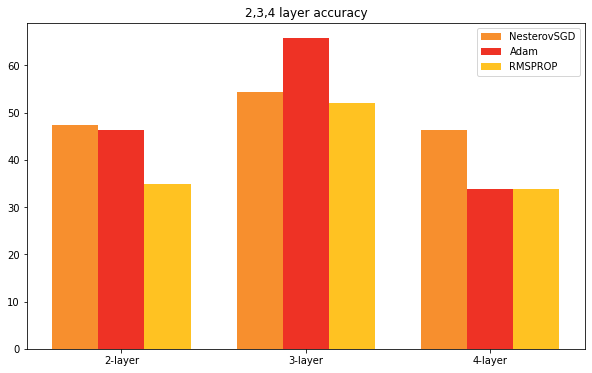

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))

a = np.array([[47.41,54.43,46.32],
              [46.39,65.73,33.75],
              [34.77,52.07,33.75]])
X=np.arange(3)

plt.bar(X+0.00,a[0],color='#F78F2E',width=0.25)
plt.bar(X+0.25,a[1],color='#EE3225',width=0.25)
plt.bar(X+0.50,a[2],color='#FFC222',width=0.25)


plt.xticks([0.25,1.25,2.25], ["2-layer", "3-layer", "4-layer"])
plt.title("2,3,4 layer accuracy")
plt.legend(['NesterovSGD','Adam','RMSPROP'])

#Network Visualization

FineTuning한 모델들을 사용하여 Network Visualization을 진행하였다.

In [ ]:
import torch
from torch.autograd import Variable
import torchvision
import torchvision.transforms as T
import random

import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
resnet_mean=np.array([0.1567,0.1528,0.1593], dtype=np.float32)
resnet_std=np.array([0.2277,0.2150,0.2136], dtype=np.float32)

def preprocess(img, size=128):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Normalize(mean=resnet_mean,
                    std=resnet_std),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(img)

def deprocess(img, should_rescale=True):
    transform = T.Compose([
        T.Lambda(lambda x: x[0]),
        T.Normalize(mean=[0, 0, 0], std=(1.0 / resnet_std).tolist()),
        T.Normalize(mean=(-resnet_mean).tolist(), std=[1, 1, 1]),
        T.Lambda(rescale) if should_rescale else T.Lambda(lambda x: x),
        T.ToPILImage(),
    ])
    return transform(img)

def rescale(x):
    low, high = x.min(), x.max()
    x_rescaled = (x - low) / (high - low)
    return x_rescaled
    
def blur_image(X, sigma=1):
    X_np = X.cpu().clone().numpy()
    X_np = gaussian_filter1d(X_np, sigma, axis=2)
    X_np = gaussian_filter1d(X_np, sigma, axis=3)
    X.copy_(torch.Tensor(X_np).type_as(X))
    return X

In [ ]:
# Download and load the pretrained ResNet18 model. #우선 우리 모델과의 적합 전에 코드 익숙해지기 위해~
#model, device, net_name, param = FineTune_ResNet18()
#model, device, net_name, param = FineTune_VGG19()
#model, device, net_name, param = FineTune_DenseNet121()
model, device, net_name, param = FineTune_AlexNet()
#model=get_resnet('resnet47')

# We don't want to train the model, so tell PyTorch not to compute gradients
# with respect to model parameters.
for param in model.parameters():
    param.requires_grad = False

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 